# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_response_content = btc_data.content
print(btc_response_content)

import json

# Formatting as json
btc_json_data = btc_data.json()

# Print json, add indents to JSON and output to screen for readability
print(json.dumps(btc_json_data, indent=4))

# Fetching the price:
btc_price = btc_json_data['data']['1']['quotes']['USD']['price']
print(btc_price)
print(type(btc_price))

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18765806,\n\t\t\t"total_supply": 18765806,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 34173.0000000000000000,\n\t\t\t\t\t"volume_24h": 20762299345,\n\t\t\t\t\t"market_cap": 641480015854,\n\t\t\t\t\t"percentage_change_1h": 0.3936833036577700,\n\t\t\t\t\t"percentage_change_24h": 1.5206929298833000,\n\t\t\t\t\t"percentage_change_7d": 8.1811665840340300,\n\t\t\t\t\t"percent_change_1h": 0.3936833036577700,\n\t\t\t\t\t"percent_change_24h": 1.5206929298833000,\n\t\t\t\t\t"percent_change_7d": 8.1811665840340300\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 42938.3745,\n\t\t\t\t\t"volume_24h": 26087829126.9925,\n\t\t\t\t\t"market_cap": 806019639920.551,\n\t\t\t\t\t"percent_change_1h": 0.3936833036577700,\n\t\t\t\t\t"percent_change_24h": 1.5206929298833000,\n\t\t\t\t\t"perce

In [6]:
# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_response_content = eth_data.content
print(eth_response_content)

# Formatting as json
eth_json_data = eth_data.json()

# Print json, add indents to JSON and output to screen for readability
print(json.dumps(eth_json_data, indent=4))

# Fetching the price:
eth_price = eth_json_data['data']['1027']['quotes']['USD']['price']
print(eth_price)
print(type(eth_price))

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 116829993,\n\t\t\t"total_supply": 116829993,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 2157.5100000000000000,\n\t\t\t\t\t"volume_24h": 18960238800,\n\t\t\t\t\t"market_cap": 252109990440,\n\t\t\t\t\t"percentage_change_1h": 0.2074131544644410,\n\t\t\t\t\t"percentage_change_24h": 1.7384934175812400,\n\t\t\t\t\t"percentage_change_7d": 13.5623934098542000,\n\t\t\t\t\t"percent_change_1h": 0.2074131544644410,\n\t\t\t\t\t"percent_change_24h": 1.7384934175812400,\n\t\t\t\t\t"percent_change_7d": 13.5623934098542000\n\t\t\t\t},\n\t\t\t\t"CAD": {\n\t\t\t\t\t"price": 2710.911315,\n\t\t\t\t\t"volume_24h": 23823540052.2,\n\t\t\t\t\t"market_cap": 316776202987.86,\n\t\t\t\t\t"percent_change_1h": 0.2074131544644410,\n\t\t\t\t\t"percent_change_24h": 1.7384934175812400,\n\t\t\t\t\t"perc

In [7]:
# Compute current value of my crpto
my_btc_value = my_btc*btc_price
print(my_btc_value)
my_eth_value = my_eth*eth_price
print(my_eth_value)

41007.6
11434.803


In [8]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41007.60
The current value of your 5.3 ETH is $11434.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [11]:
# Get today's date
# todays_date = datetime.date(datetime.now())
todays_date = datetime.now()
print(todays_date)

2021-07-24 21:42:41.496849


In [12]:
# Format current date as ISO format
start_date = pd.Timestamp(todays_date, tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=start_date,
    limit=1000,
).df

# Preview DataFrame
df_ticker.head()

Empty DataFrame
Columns: [(AGG, open), (AGG, high), (AGG, low), (AGG, close), (AGG, volume), (SPY, open), (SPY, high), (SPY, low), (SPY, close), (SPY, volume)]
Index: []

# Why does the above dataframe have numerous dates? **SOLVED**
### Needed to include TimeZone!

In [13]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker.iloc[0]['AGG']['close']
print(agg_close_price)
spy_close_price = df_ticker.iloc[0]['SPY']['close']
print(spy_close_price)

116.21
439.9


In [14]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.21
Current SPY closing price: $439.9


In [15]:
# Compute the current value of shares
my_spy_value = agg_close_price*my_spy
my_agg_value = spy_close_price*my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5810.50
The current value of your 200 AGG shares is $87980.00


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets_data = [(my_btc_value + my_eth_value), (my_spy_value + my_agg_value)]
assets_index = ['crypto','shares']
assets_column = ['amount']

# Create savings DataFrame
df_savings = pd.DataFrame(data=assets_data, index = assets_index, columns=assets_column )

# Display savings DataFrame
display(df_savings)

,amount
crypto,51415.905
shares,93790.500


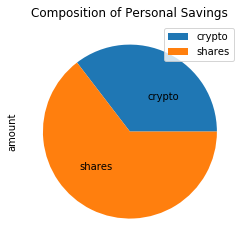

In [17]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings", labeldistance=.45)

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

# Calculate total amount of savings
total_savings = df_savings.loc['crypto'][0] + df_savings.loc['shares'][0]
print(total_savings)

# Testing the if/else statment:
# total_savings = 10000
#total_savings = 36000

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have exceeded your emergency fund requirements!")
elif total_savings == emergency_fund:
    print("You have met your emergency fund needs.")
elif total_savings < emergency_fund:
    print(f"You still have work to do.  You need ${emergency_fund-total_savings:0.2f} more to reach your goal.")

36000
145206.405
Congratulations, you have exceeded your emergency fund requirements!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [11]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [12]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [13]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [14]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [15]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998146,1.007029,0.987055,0.999404,0.993302,1.004339,0.999089,1.004384,1.005793,0.996054,...,1.004049,1.014938,1.010905,0.992350,1.007549,1.007042,1.013902,0.985970,0.983692,1.001845
2,0.998593,1.006545,0.991178,0.991756,1.002316,0.997203,0.998773,1.010303,1.015561,0.998954,...,1.016065,1.027627,1.016908,0.986780,1.021408,0.998146,1.005148,0.982480,0.972913,1.007109
3,1.003536,1.009354,0.991916,0.994499,1.002919,1.004159,0.986150,1.023830,1.012343,1.011846,...,1.014404,1.018272,1.011050,0.994946,1.021736,1.005794,1.006031,0.977000,0.972807,1.004090
4,1.021276,1.008921,0.986476,0.993766,1.008685,1.001797,0.987642,1.024338,1.001164,1.030781,...,1.016842,1.025369,0.998935,0.982796,1.007081,1.011488,1.012748,0.981024,0.972878,1.002966
5,1.018579,1.004130,0.984542,0.988589,1.013140,1.008437,0.982756,1.016248,0.997056,1.030604,...,1.020863,1.027432,0.995394,0.981878,1.004466,1.021730,1.013888,0.980468,0.982726,1.011065
6,1.015476,0.993875,0.979694,0.984796,1.001711,1.003032,0.981273,1.009817,1.006688,1.026384,...,1.022520,1.022914,1.005285,0.988459,1.003175,1.020951,1.023473,0.966194,0.989076,1.000212
7,1.006866,0.989923,0.981773,0.983082,1.005157,1.015676,0.983745,1.012034,1.017033,1.027123,...,1.018837,1.021643,0.995253,0.981817,0.998574,1.008606,1.029003,0.962063,0.992101,0.982632
8,1.008809,0.990639,0.979783,0.998510,1.000784,1.018511,0.986195,1.011916,1.017342,1.030072,...,1.019767,1.010561,0.992225,0.975421,0.986836,1.018503,1.020888,0.977964,0.989900,0.982711
9,1.008994,0.986322,0.980831,1.011584,0.991261,1.027158,0.996284,1.023729,1.026721,1.022178,...,1.030294,1.015746,0.993622,0.967373,0.994862,1.023756,1.019287,0.983796,0.992372,0.990936


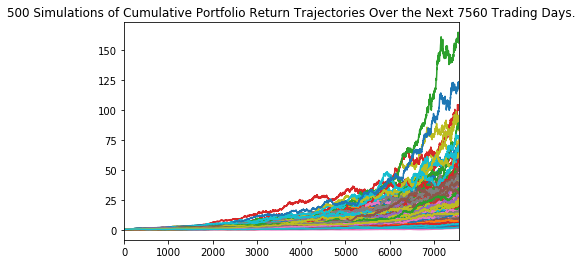

In [16]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

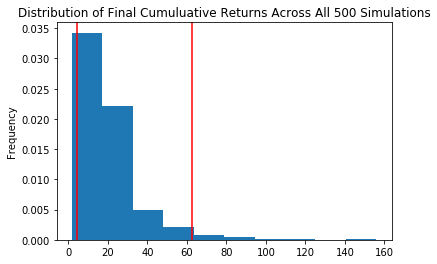

In [17]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [18]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_stats_tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(mc_stats_tbl)

count           500.000000
mean             20.668291
std              16.054743
min               1.758143
25%              10.894979
50%              16.535539
75%              25.336617
max             155.857374
95% CI Lower      4.461628
95% CI Upper     62.607764
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [19]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_stats_tbl[8]*initial_investment, 2)
ci_upper = round(mc_stats_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89232.55 and $1252155.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [20]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_stats_tbl[8]*initial_investment, 2)
ci_upper = round(mc_stats_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133848.83 and $1878232.91


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [21]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [22]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [23]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001139,0.998178,1.001206,0.994221,1.005114,0.984666,0.991383,0.993083,0.993152,0.990518,...,1.015208,0.995517,1.007371,0.999215,1.003800,0.995018,1.005226,0.990948,0.991639,1.000610
2,1.007362,1.008643,1.007088,0.980558,1.001317,0.993002,0.996612,0.989299,0.983268,0.997972,...,1.011722,0.991210,0.996370,1.003809,1.000888,0.994604,1.009488,1.001258,0.979926,0.999815
3,1.000436,1.003431,0.995463,0.976646,1.010746,1.012312,1.013301,0.995383,0.972607,0.995294,...,1.012260,0.996157,1.012659,0.999883,1.006746,0.983719,0.999557,0.985875,0.994151,0.991242
4,1.004727,0.996371,0.979777,0.986690,1.016135,1.012043,1.020994,1.000675,0.970163,0.997948,...,1.004891,0.980136,1.008104,0.998598,1.013955,0.985222,1.008448,0.994601,0.996019,1.000719
5,1.010252,1.010923,0.981490,0.980038,1.013278,0.997250,1.010765,1.003754,0.961906,1.005534,...,1.005762,0.979594,0.995765,1.001864,1.003395,0.996555,1.013701,0.996627,1.006290,0.984787
6,1.008599,1.001531,0.973829,0.976022,1.012664,0.990059,1.013416,1.017539,0.965690,1.011470,...,0.993919,0.983367,1.004326,1.006676,1.001205,0.994895,1.008963,0.991880,1.008916,0.998957
7,0.996154,1.010834,0.972492,0.985245,1.006128,0.993726,1.013155,1.016968,0.959420,1.021628,...,0.978600,0.985561,1.010078,0.999843,1.017377,0.987533,1.016934,0.986338,0.998765,0.982724
8,0.993683,1.005318,0.967897,0.972700,1.005505,1.007281,1.011916,1.025271,0.947888,1.021924,...,0.970046,0.980023,1.020098,0.999280,1.018101,0.979185,1.017821,1.004122,0.998055,0.988763
9,0.996552,1.008833,0.962729,0.976312,1.009983,1.003240,1.016512,1.025924,0.950945,1.018180,...,0.971999,0.993365,1.041556,1.005050,1.016160,0.974611,1.015803,0.999538,1.007409,0.988398


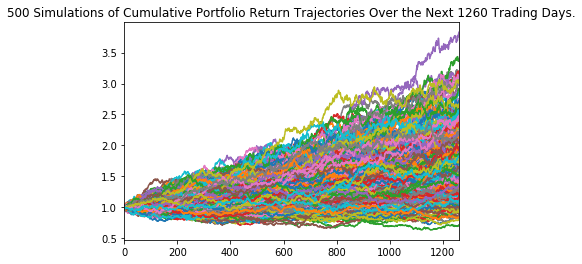

In [24]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

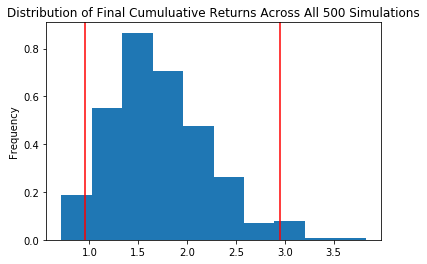

In [25]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_fiveyear.plot_distribution()

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_stats_tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(mc_stats_tbl)

count           500.000000
mean              1.711630
std               0.495419
min               0.712420
25%               1.359024
50%               1.645532
75%               2.026186
max               3.828695
95% CI Lower      0.955420
95% CI Upper      2.955339
Name: 1260, dtype: float64


In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(mc_stats_tbl[8]*initial_investment, 2)
ci_upper_five = round(mc_stats_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $28662.61 and $88660.16


### Ten Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006049,0.993687,0.992376,1.000556,1.010255,0.985398,1.003151,1.002770,1.006479,0.990775,...,1.007575,1.003983,0.991463,0.997798,1.000999,0.998128,0.996303,1.000457,1.002176,1.021903
2,1.010253,0.986217,0.994203,0.997313,1.018367,0.987879,1.003247,1.009858,1.012760,0.992481,...,1.015961,1.001174,0.996010,0.997975,0.998986,0.989615,0.989958,0.992799,0.992090,1.020121
3,1.019062,0.984175,0.997829,0.989283,1.012560,0.982316,0.998299,1.018675,1.013984,0.994815,...,1.021046,1.010010,1.008006,1.023594,1.004358,0.989731,0.995995,0.998765,0.997782,1.022086
4,1.010164,0.977603,1.005870,0.990186,1.015343,0.985579,0.996268,1.012479,1.020492,0.996308,...,1.027097,1.015699,1.006605,1.035905,1.007990,0.983103,1.000847,0.992606,0.991054,1.009097
5,1.006922,0.980717,1.005977,0.982272,1.014348,0.976282,0.984697,1.010737,1.017404,1.002439,...,1.022175,1.009268,1.000276,1.028228,1.007583,0.989694,1.006463,0.998251,0.992695,1.007362
6,1.010015,0.994028,1.000371,0.969427,1.015868,0.977398,0.973604,1.000985,1.023543,0.998240,...,1.028328,0.992712,1.005204,1.037239,0.998179,0.992403,1.007022,1.000080,0.994237,1.002309
7,1.009092,0.998236,0.996795,0.962322,1.021991,0.975283,0.963028,0.998089,1.011790,0.987811,...,1.038047,0.992945,1.008605,1.030596,1.012381,0.994533,1.000046,1.004113,1.006187,1.002318
8,0.999813,1.006572,0.988369,0.966213,1.022031,0.978184,0.964207,0.992208,1.009132,0.983862,...,1.033572,1.000981,1.011874,1.035371,1.009877,1.004481,1.002801,1.004107,1.006111,1.006985
9,1.007011,0.992850,0.991952,0.959635,1.013631,0.984396,0.958148,0.998540,1.015372,0.997419,...,1.029583,1.007242,1.012051,1.032988,0.998983,1.011670,1.015174,1.007211,1.000869,1.019800


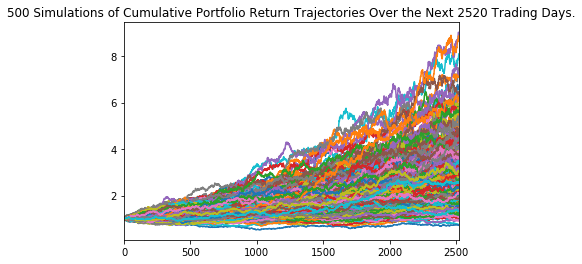

In [31]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

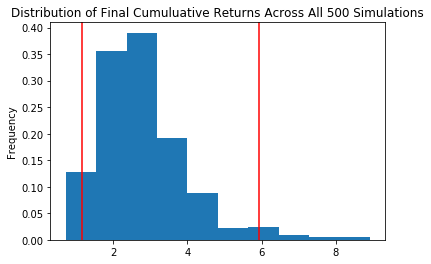

In [32]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_tenyear.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_stats_tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(mc_stats_tbl)

count           500.000000
mean              2.800802
std               1.209495
min               0.723336
25%               1.987559
50%               2.597138
75%               3.354357
max               8.921909
95% CI Lower      1.156886
95% CI Upper      5.929390
Name: 2520, dtype: float64


In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round(mc_stats_tbl[8]*initial_investment, 2)
ci_upper_ten = round(mc_stats_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $34706.59 and $177881.69
